In [1]:
import numpy as np
import pandas as pd
import math

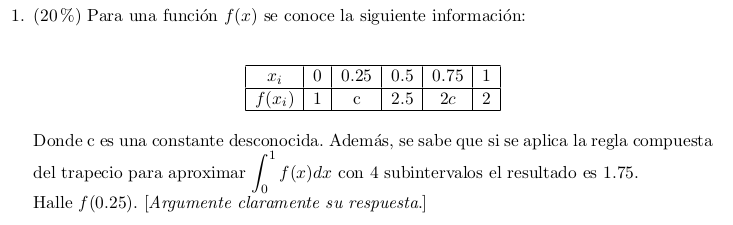

Usamos los valores que tenemos para hacer a mano la formula sumatoria del método del trapecio y despues despejamos c en ella, como f(0.25) = c, al encontrar este valor tendremos f(c).

In [15]:
c = ((1.75 *2 /0.25)-4)/6
c

1.6666666666666667

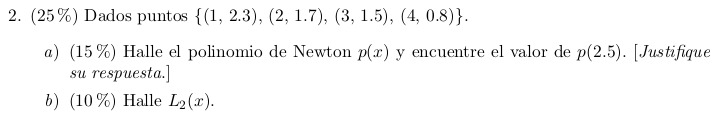


a) 

El polinomio de Newton según la tabla de diferencias divididas, sería:

$ p(x) = 2.3 - 0.6(x - 1) + 0.2(x - 1)(x - 2) - 0.15(x - 1)(x - 2)(x - 3)$

Así, despues de evaluar encontramos que:

$ p(2.5) = 1.6062499999999997$

b)

Para hallar $L_2(x)$ usaremos la siguiente formula contando el primer punto dado como $(x_0, y_0)$

$\frac{(x - 1)(x - 2)(x - 4)}{(3 - 1)(3 - 2)(3 - 4)}$

In [10]:
pd.set_option("display.precision", 10)

def get_diff_table(X,Y):
    n=len(X)
    A=np.zeros([n,n])
    
    for i in range(0,n):
        A[i][0] = Y[i]
    
    for j in range(1,n):
        for i in range(j,n):
            A[i][j] = (A[i][j-1] - A[i-1][j-1])/(X[i]-X[i-j])
    
    return A

x = np.array([1, 2, 3, 4])
y = np.array([2.3, 1.7, 1.5, 0.8])
pd.DataFrame(get_diff_table(x, y))

,0,1,2,3
0,2.3,0.0,0.00,0.00
1,1.7,-0.6,0.00,0.00
2,1.5,-0.2,0.20,0.00
3,0.8,-0.7,-0.25,-0.15


In [9]:
def p(x):
    return 2.3 - 0.6*(x-1) + 0.2*(x - 1)*(x - 2) - 0.15*(x - 1)*(x - 2)*(x - 3)

p(2.5)

1.6062499999999997

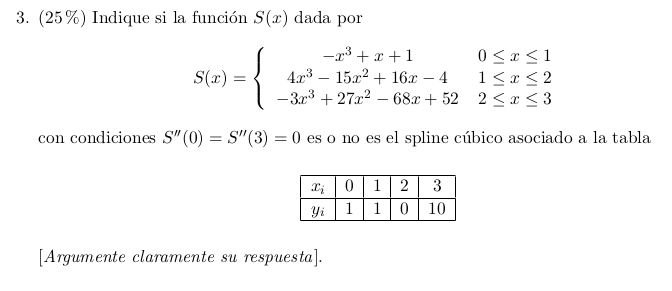

Para resolver este ejercicio, tomaré los puntos y calcularé la función por tramos del spline cúbico, si es la misma, entonces está correcto de lo contrario no.

Primero usamos Matlab para hallar la matriz que nos permitirá crear un sistema de ecuaciones para el spline.

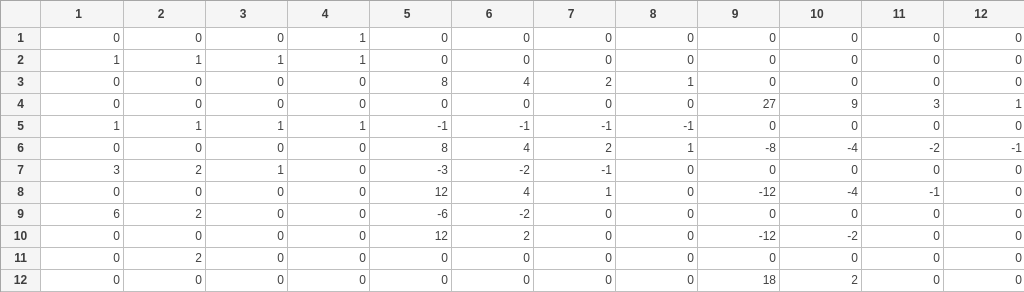

SI ES.

In [11]:
# Resolvemos el sistema de ecuaciones
b = np.array([1, 1, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0])
A = np.array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
              [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 8, 4, 2, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 27, 9, 3, 1],
              [1, 1, 1, 1, -1, -1, -1, -1, 0, 0, 0, 0],
              [0, 0, 0, 0, 8, 4, 2, 1, -8, -4, -2, -1],
              [3, 2, 1, 0, -3, -2, -1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 12, 4, 1, 0, -12, -4, -1, 0],
              [6, 2, 0, 0, -6, -2, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 12, 2, 0, 0, -12, -2, 0, 0],
              [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 18, 2, 0, 0]])

np.linalg.solve(A, b)

array([ -1.,   0.,   1.,   1.,   4., -15.,  16.,  -4.,  -3.,  27., -68.,
        52.])